In [1]:
import random
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from matplotlib import pyplot as plt

from sklearn.datasets import load_iris

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def get_acc(model, X, y):
    y_pred = model.predict(X)
    return sum(y_pred == y) / len(y)

In [4]:
iris = load_iris(as_frame=True)
print(list(iris))
print(iris.target_names)

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']
['setosa' 'versicolor' 'virginica']


In [5]:
iris_data = iris.data
iris_data.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = iris_data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# decision tree 실습
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [7]:
# 학습된 decision tree의 성능 평가
get_acc(tree_clf, X_test, y_test)

0.9736842105263158

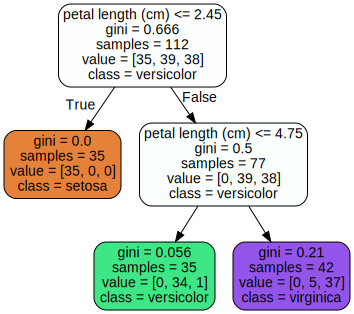

In [8]:
# 학습된 decision tree 시각화
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=str("iris_tree.dot"),
        feature_names=["petal length (cm)", "petal width (cm)"],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file("iris_tree.dot")

In [10]:
X = iris_data.values
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# decision tree 과적합 실험
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [11]:
train_acc = get_acc(tree_clf, X_train, y_train)
test_acc = get_acc(tree_clf, X_test, y_test)
print(f'train acc: {train_acc} / test acc: {test_acc} / diff: {train_acc - test_acc}')
# 과적합을 강제로 발생시켰기 때문에 test acc는 확률이 떨어져야 했는데, 자료 자체가 워낙 좋은거라 100%가 나와버림

train acc: 1.0 / test acc: 1.0 / diff: 0.0


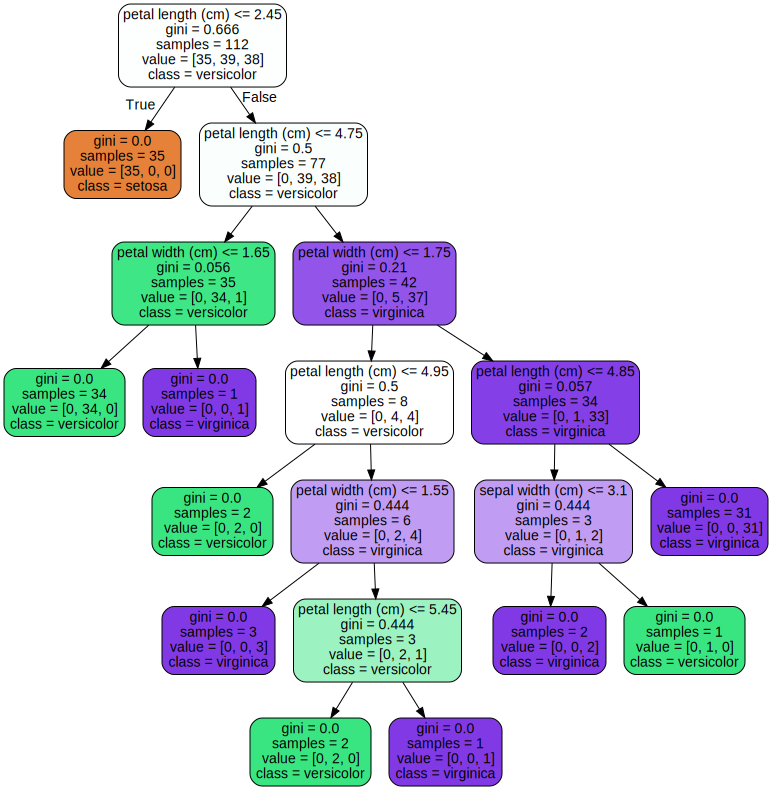

In [12]:
export_graphviz(
        tree_clf,
        out_file=str("iris_tree.dot"),
        feature_names=["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file("iris_tree.dot")

In [13]:
titanic_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2학기/2교시-기계학습 기초/10 주차 의사 결정 트리/titanic.csv')
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
titanic_df.info()
# Survived가 target data
# 전처리가 필요한 데이터들 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
# 누락값 처리 (Age[mean], Cabin['N'], Embarked['N'])
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
# 범주형 데이터 처리
from sklearn.preprocessing import LabelEncoder

features = ['Cabin', 'Sex', 'Embarked']
for feature in features:
    le = LabelEncoder()
    le = le.fit(titanic_df[feature])
    titanic_df[feature] = le.transform(titanic_df[feature])

In [32]:
y = titanic_df['Survived']
X = titanic_df.drop(['PassengerId','Name','Ticket', 'Survived', 'Cabin'], axis=1)

X_train, X_test, y_train, y_test=train_test_split(X, y)

# decision tree 학습
tree_titanic_clf = DecisionTreeClassifier(random_state=42)
tree_titanic_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

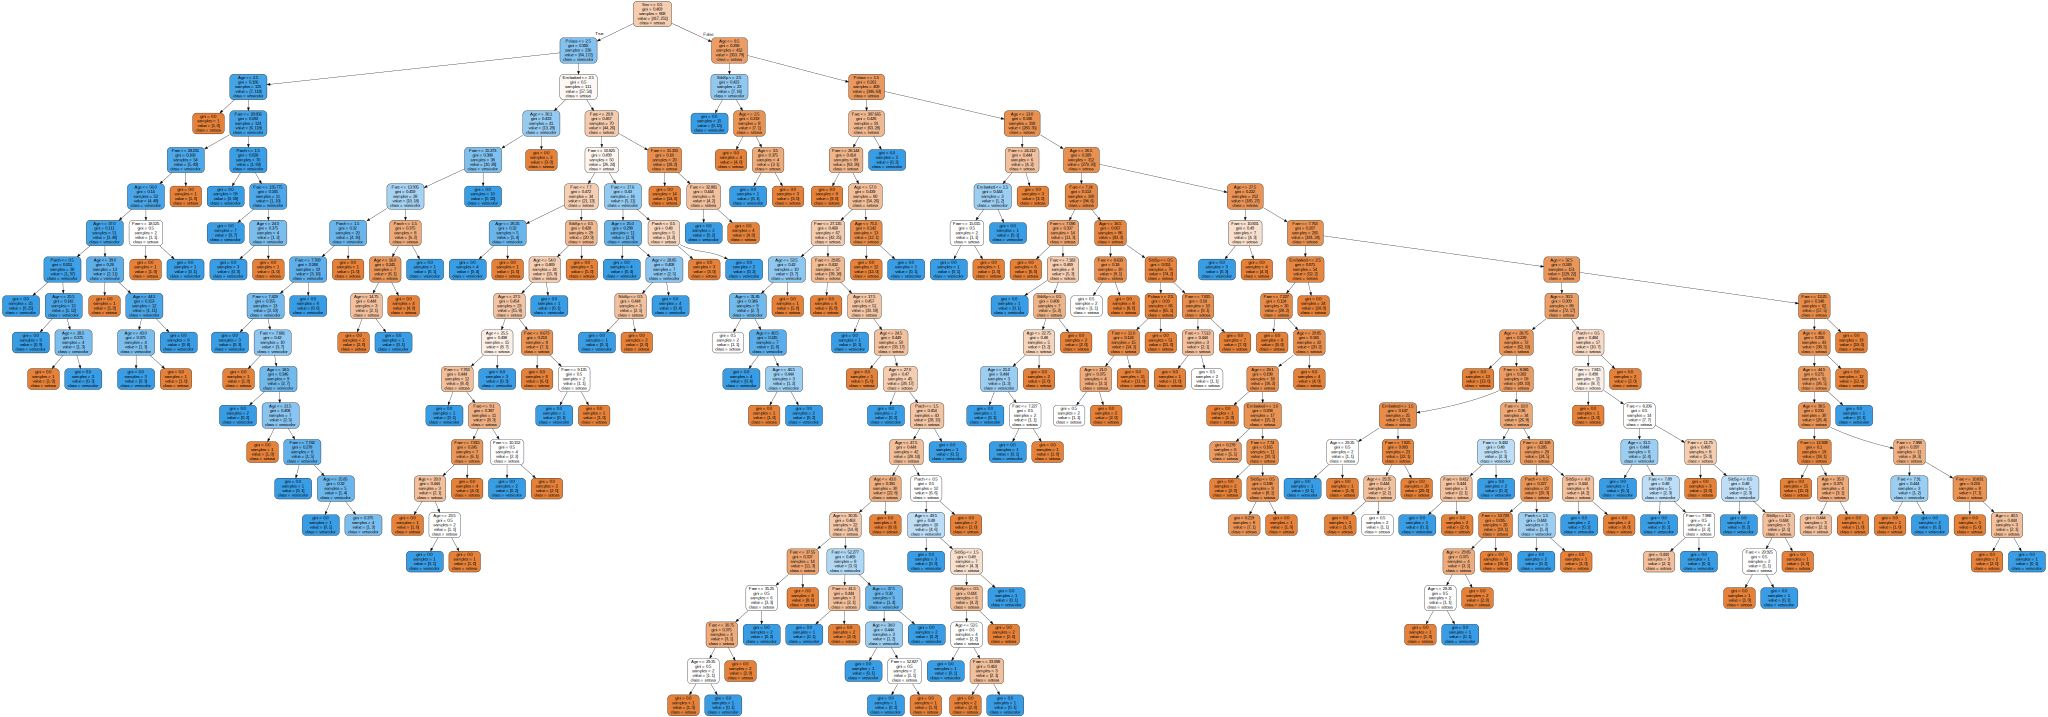

In [33]:
export_graphviz(
        tree_clf,
        out_file=str("titanic_tree.dot"),
        feature_names=list(X_train.columns),
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file("titanic_tree.dot")

In [34]:
train_acc = get_acc(tree_titanic_clf, X_train, y_train)
test_acc = get_acc(tree_titanic_clf, X_test, y_test)

print(f'train acc: {train_acc} / test acc: {test_acc} / diff: {train_acc - test_acc}')

train acc: 0.9820359281437125 / test acc: 0.7488789237668162 / diff: 0.23315700437689635


In [47]:
# 사전 가지치기를 적용한 decision tree 학습
# tree_titanic_clf_2 = DecisionTreeClassifier(max_leaf_nodes=30,random_state=42)
tree_titanic_clf_2 = DecisionTreeClassifier(max_depth=2,random_state=42)
tree_titanic_clf_2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [48]:
train_acc = get_acc(tree_titanic_clf_2, X_train, y_train)
test_acc = get_acc(tree_titanic_clf_2, X_test, y_test)

print(f'train acc: {train_acc} / test acc: {test_acc} / diff: {train_acc - test_acc}')
# 정확도가 좀 낮더라도, test의 결과가 train과 근접한 것이 낫다

train acc: 0.7994011976047904 / test acc: 0.7847533632286996 / diff: 0.014647834376090851
